In [1]:
from google.colab import drive
drive.mount('/content/datasets')

Mounted at /content/datasets


In [3]:
import os, shutil

# original_dataset_dir = "./datasets/dogs-vs-cats/train"
base_dir = "/content/datasets/MyDrive/cats_and_dogs_small"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
val_cats_dir = os.path.join(validation_dir, 'cats')
val_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [4]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [6]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # 모든 이미지를 150 * 150크기로 변경
    batch_size=20,
    class_mode='binary'  # 이진 레이블로 설정 ( binary crossentropy 손실을 사용하기 위해 )
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
# data : ( batch samples, height, width, channel )
# label : ( batch samples, )
for data_batch, labels_batch in validation_generator:
    print('batch data size:', data_batch.shape)
    print('batch label size:', labels_batch.shape)
    break

batch data size: (20, 150, 150, 3)
batch label size: (20,)


In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

Epoch 1/30
100/100 - 591s - loss: 0.6900 - acc: 0.5405 - val_loss: 0.6759 - val_acc: 0.5810
Epoch 2/30
100/100 - 110s - loss: 0.6578 - acc: 0.6025 - val_loss: 0.6552 - val_acc: 0.6030
Epoch 3/30
100/100 - 110s - loss: 0.6187 - acc: 0.6565 - val_loss: 0.6353 - val_acc: 0.6240
Epoch 4/30
100/100 - 110s - loss: 0.5754 - acc: 0.6935 - val_loss: 0.5976 - val_acc: 0.6680
Epoch 5/30
100/100 - 111s - loss: 0.5269 - acc: 0.7300 - val_loss: 0.5683 - val_acc: 0.6940
Epoch 6/30
100/100 - 110s - loss: 0.4985 - acc: 0.7535 - val_loss: 0.6304 - val_acc: 0.6440
Epoch 7/30
100/100 - 110s - loss: 0.4804 - acc: 0.7735 - val_loss: 0.5474 - val_acc: 0.7260
Epoch 8/30
100/100 - 111s - loss: 0.4474 - acc: 0.7890 - val_loss: 0.5304 - val_acc: 0.7340
Epoch 9/30
100/100 - 111s - loss: 0.4173 - acc: 0.8125 - val_loss: 0.5492 - val_acc: 0.7230
Epoch 10/30
100/100 - 111s - loss: 0.3912 - acc: 0.8235 - val_loss: 0.5493 - val_acc: 0.7270
Epoch 11/30
100/100 - 111s - loss: 0.3685 - acc: 0.8415 - val_loss: 0.5420 - va

In [10]:
# 모델 저장
model.save('cats_and_dogs_small_1.h5')

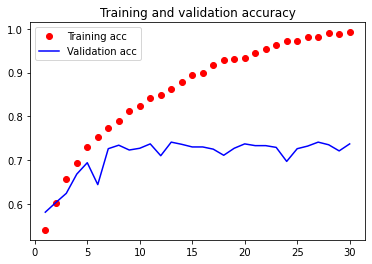

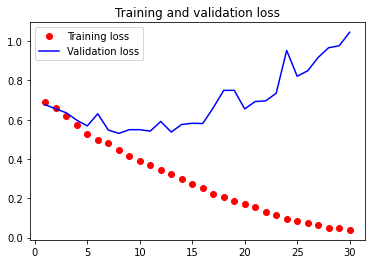

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()